___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

In [173]:
from google.colab import drive
#drive.mount('/content/drive')

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

the deleted features (rownumber,surname, Customer_ID)
geography the feature that will not be trained

# Improt Libraries & Data

In [174]:
import os

# Set tensorflow log level to ignore INFOs.
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Uncomment the following lines if you want to suppress warnings:
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Set it to None to display all rows in the dataframe:
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe:
pd.set_option("display.max_columns", None)

In [176]:
!pip3 install tensorflow

In [177]:
# Get tensorflow version
import tensorflow as tf

In [178]:
# List cuda-capable gpu's that are attached to this session
if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session.")
else:
    print("This session will run on CPU.")

GPU support is enabled for this session.


In [179]:
# Get more information about gpu (if available)
if tf.config.list_physical_devices("GPU"):
    !nvidia-smi

Mon Oct 30 11:33:19 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   77C    P0    33W /  70W |    619MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [180]:
#df = pd.read_csv("/content/drive/MyDrive/Churn_Modelling.csv")
df = pd.read_csv("Churn_Modelling.csv")

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

Implement basic steps to see how is your data looks like

In [181]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [183]:
df.shape

(10000, 14)

In [184]:
df.duplicated().sum()

0

In [185]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.780,2,1,0,149756.710,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.000,2,1,1,10062.800,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.740,4,1,0,119346.880,1
8,9,15792365,He,501,France,Male,44,4,142051.070,2,0,1,74940.500,0
9,10,15592389,H?,684,France,Male,27,2,134603.880,1,1,1,71725.730,0


In [186]:
df.tail(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9990,9991,15798964,Nkemakonam,714,Germany,Male,33,3,35016.600,1,1,0,53667.080,0
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.210,1,1,0,69384.710,1
9992,9993,15657105,Chukwualuka,726,Spain,Male,36,2,0.000,1,1,0,195192.400,0
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.410,1,1,0,29179.520,0
9994,9995,15719294,Wood,800,France,Female,29,2,0.000,2,0,0,167773.550,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.000,2,1,0,96270.640,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.610,1,1,1,101699.770,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.000,1,0,1,42085.580,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.310,2,1,0,92888.520,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.790,1,1,0,38190.780,0


In [187]:
# No outliers only feature (Age) has a little bit outliers as pressented in the below pic
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


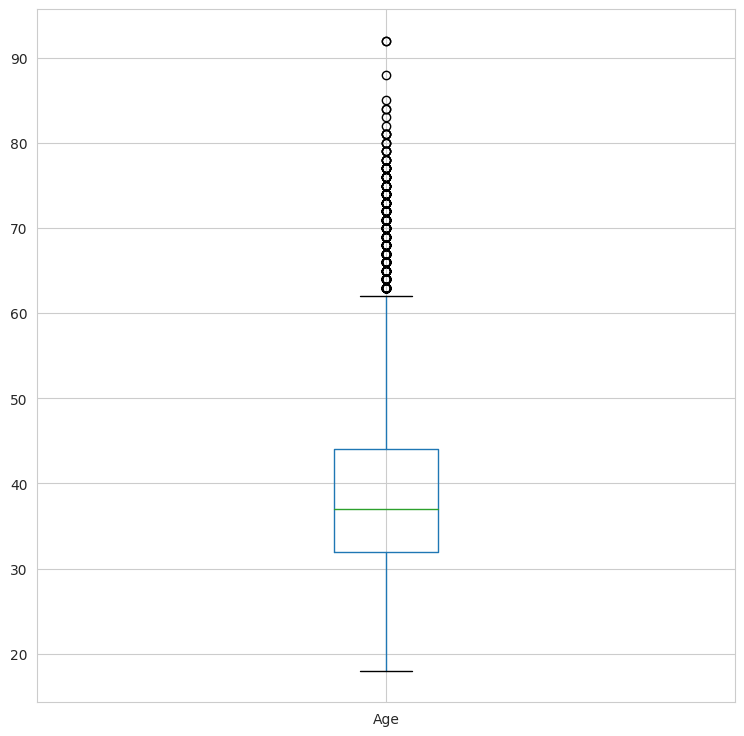

In [188]:
# Age feature contains some outliers
plt.figure(figsize=(9,9))
df.boxplot(['Age'])
plt.show()

In [189]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

Check for missing values

In [190]:
df.isnull().sum() #no missing values

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Implement basic visualization steps such as histogram, countplot, heatmap

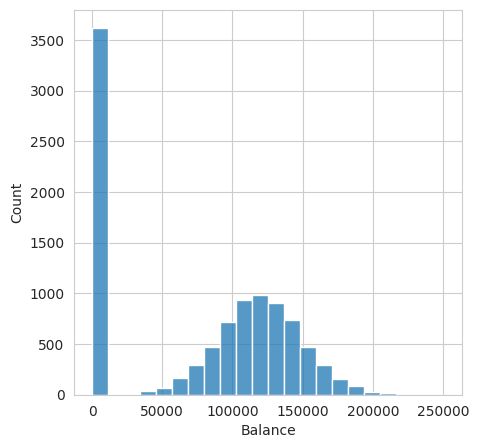

In [197]:
# people with 0 balance are much more than the rest, but we cant consider them as outliers
plt.figure(figsize=(5,5))
sns.histplot(x=df["Balance"])
plt.show()


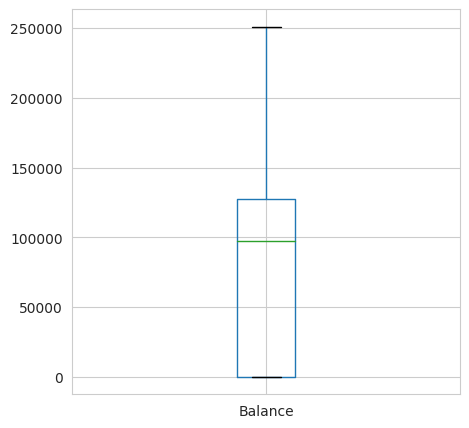

In [198]:
# we could notice that the boxplot of 'Balance' doesnt show any outlier
plt.figure(figsize=(5,5))
df.boxplot(['Balance'])
plt.show()

In [199]:
# The classes are imbalanced
df.Exited.value_counts()


0    7963
1    2037
Name: Exited, dtype: int64

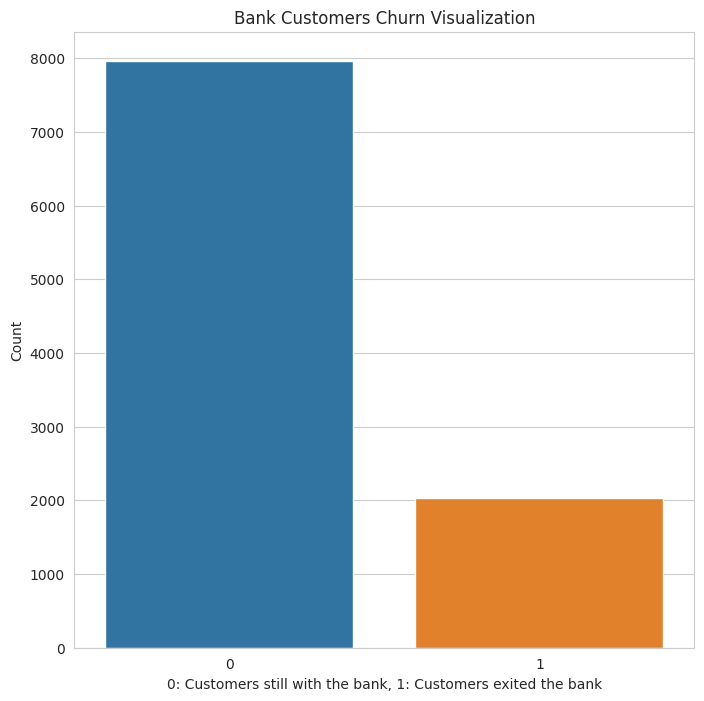

In [200]:
# Visualizing the classes which are imbalanced
plt.figure(figsize=(8,8))
sns.countplot(x='Exited', data=df)
plt.xlabel('0: Customers still with the bank, 1: Customers exited the bank')
plt.ylabel('Count')
plt.title('Bank Customers Churn Visualization')
plt.show()

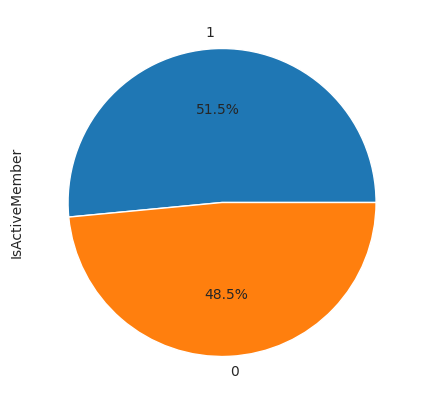

In [201]:
# We have a fair amount of each Active and NotActive
df["IsActiveMember"].value_counts().plot(kind="pie", autopct='%1.1f%%',figsize=(5,5));

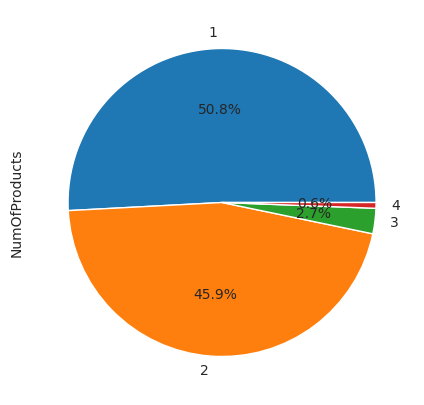

In [202]:
# People with 1 and 2 products take the majority
df["NumOfProducts"].value_counts().plot(kind="pie", autopct='%1.1f%%',figsize=(5,5));

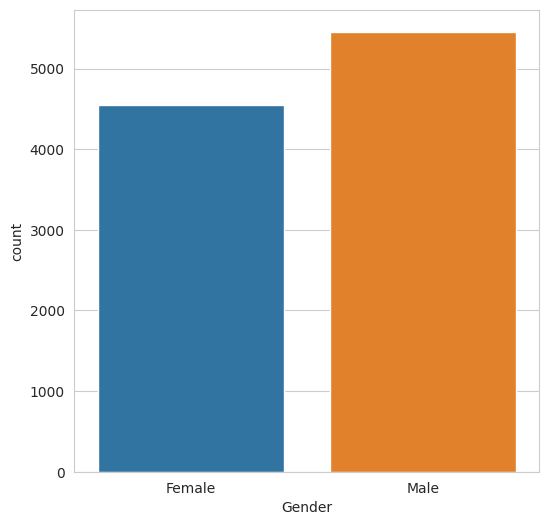

In [203]:
# Males are slitghtly more than females
plt.figure(figsize=(6,6))
sns.countplot(x=df["Gender"])
plt.show()

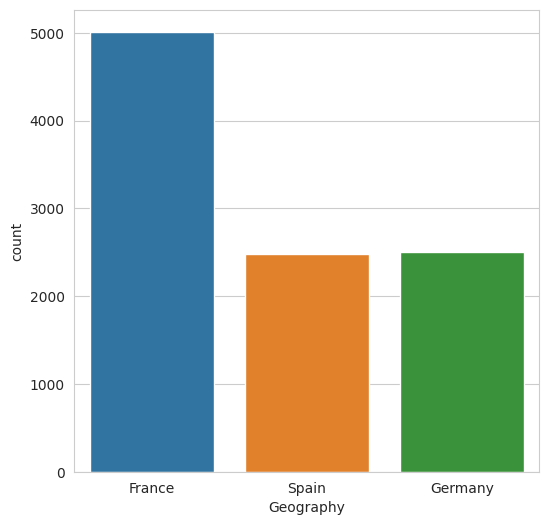

In [204]:
# France takes the majority
plt.figure(figsize=(6,6))
sns.countplot(x=df["Geography"])
plt.show()

In [205]:
# compare with the number of people in each country, a lot of germany people close their account
grouped = df.groupby('Geography')['Exited'].agg(Count='value_counts')
grouped

Count
Geography Exited       
France    0        4204
          1         810
Germany   0        1695
          1         814
Spain     0        2064
          1         413

In [206]:
# Most of people in our sample in their 30`s
df.Age.value_counts()

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: Age, Length: 70, dtype: int64

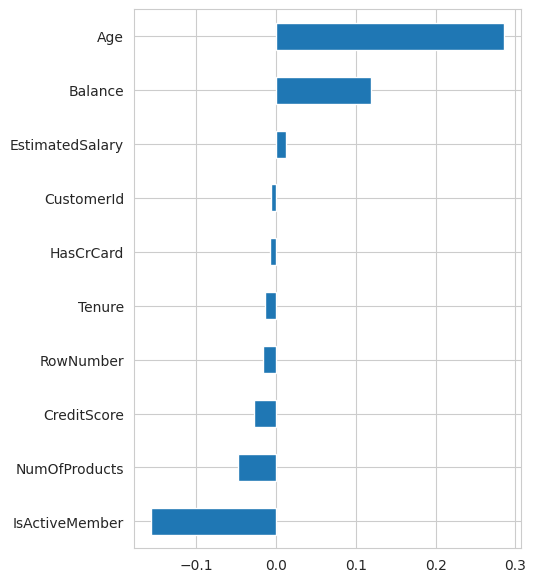

In [207]:
# There are no high corrleation
plt.figure(figsize=(5,7))
(df.corr(numeric_only=True)["Exited"].sort_values().drop("Exited").plot(kind="barh"))
plt.show()

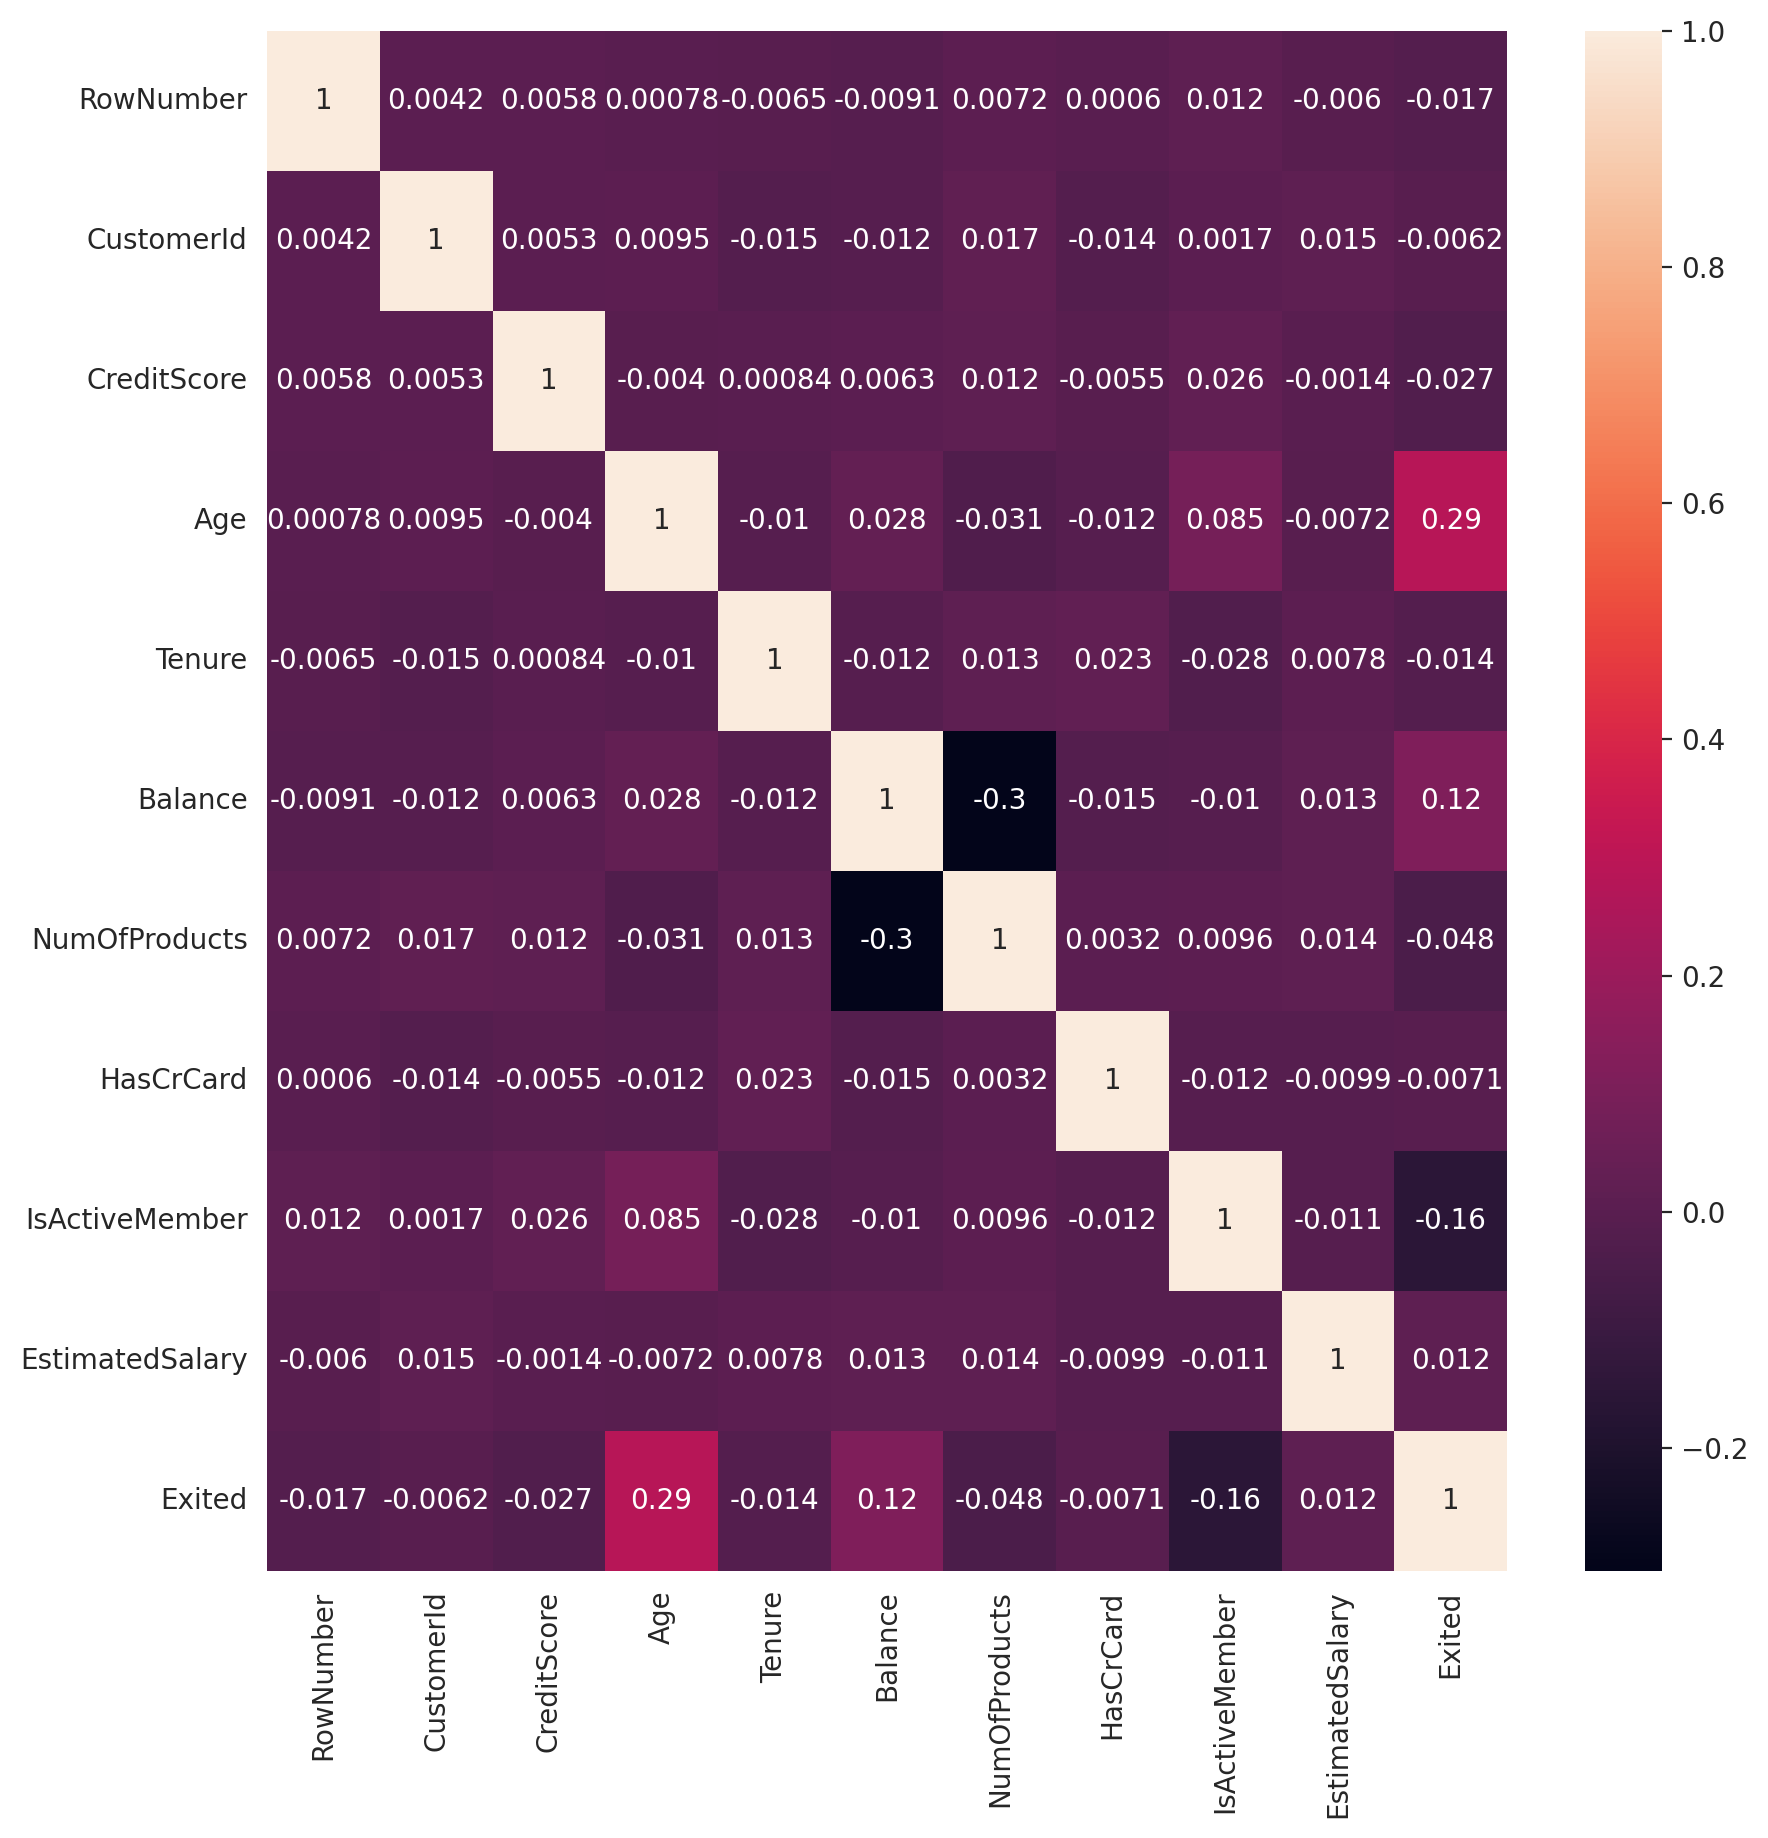

In [208]:
# There are no high corrleation
plt.figure(figsize=(10,10), dpi=200)
sns.heatmap(df.corr(), annot=True);

Drop the features that not suitable for modelling

In [209]:
# drop unnecessary features
df.drop(columns=['RowNumber', 'Surname', 'CustomerId'], inplace=True)

In [210]:
df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0
5,645,Spain,Male,44,8,113755.780,2,1,0,149756.710,1
6,822,France,Male,50,7,0.000,2,1,1,10062.800,0
7,376,Germany,Female,29,4,115046.740,4,1,0,119346.880,1
8,501,France,Male,44,4,142051.070,2,0,1,74940.500,0
9,684,France,Male,27,2,134603.880,1,1,1,71725.730,0


Convert categorical variables to dummy variables

In [211]:
df_d = df.copy() # where d stand for dummies

# calling the get_dummies method to convert categorical to numerical
df_d = pd.get_dummies(df_d,
                     columns = ['Gender', 'Geography'])

display(df_d)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.000,1,1,1,101348.880,1,1,0,1,0,0
1,608,41,1,83807.860,1,0,1,112542.580,0,1,0,0,0,1
2,502,42,8,159660.800,3,1,0,113931.570,1,1,0,1,0,0
3,699,39,1,0.000,2,0,0,93826.630,0,1,0,1,0,0
4,850,43,2,125510.820,1,1,1,79084.100,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.000,2,1,0,96270.640,0,0,1,1,0,0
9996,516,35,10,57369.610,1,1,1,101699.770,0,0,1,1,0,0
9997,709,36,7,0.000,1,0,1,42085.580,1,1,0,1,0,0
9998,772,42,3,75075.310,2,1,0,92888.520,1,0,1,0,1,0


# Preprocessing of Data
- Train | Test Split, Scalling

In [217]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [218]:
# Here the model wont give us different result with each run (unless we made some changes to the model)
SEED = 42
import random

os.environ["TF_DETERMINISTIC_OPS"] = "1"
tf.keras.utils.set_random_seed(SEED)
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [219]:
# df_d : the orginal data frame after the encoding
X = df_d.drop("Exited", axis=1)
y = df_d["Exited"]

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.10, random_state=SEED)
X_train, x_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.10, random_state=SEED)

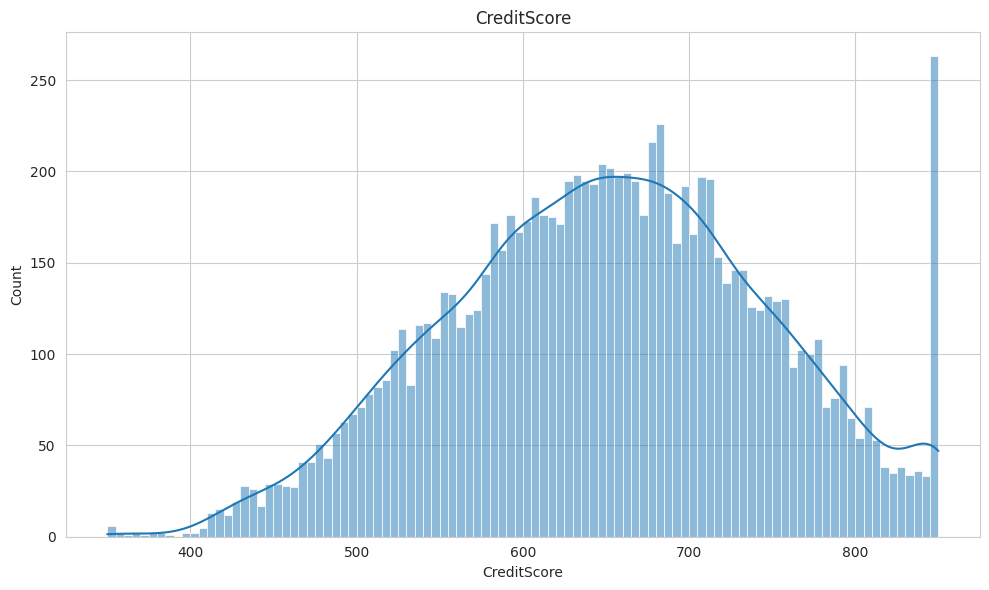

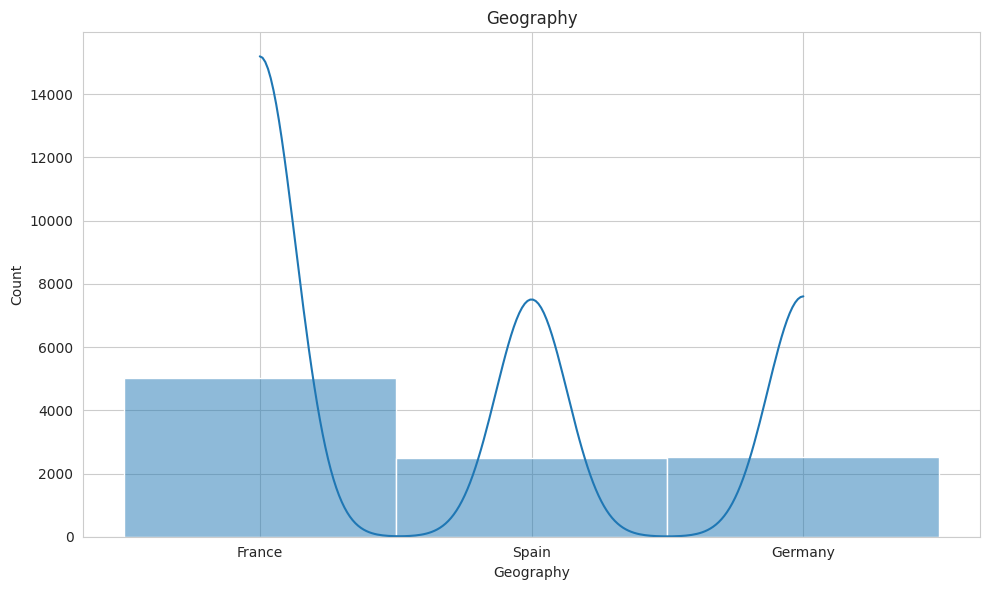

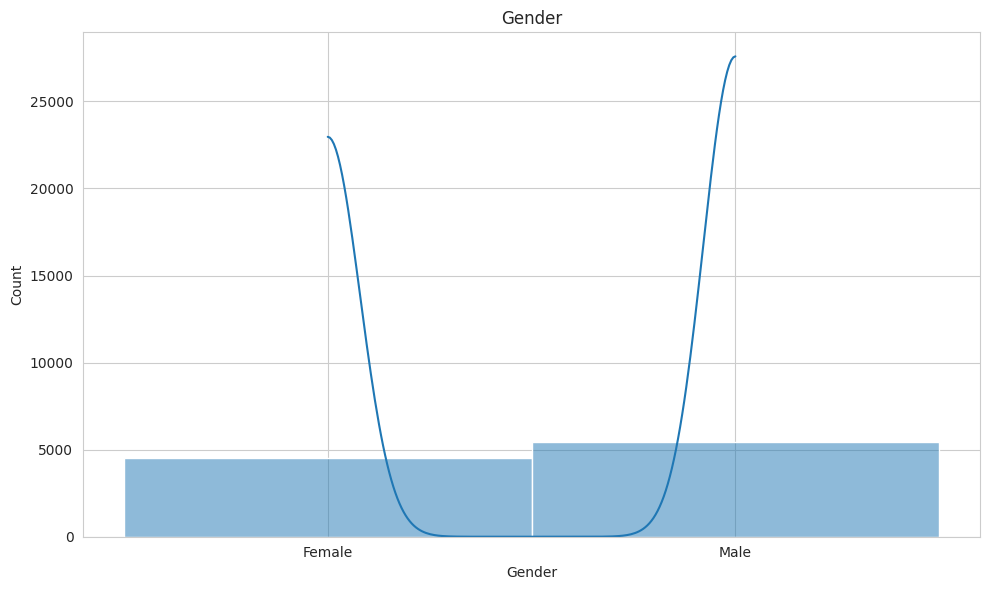

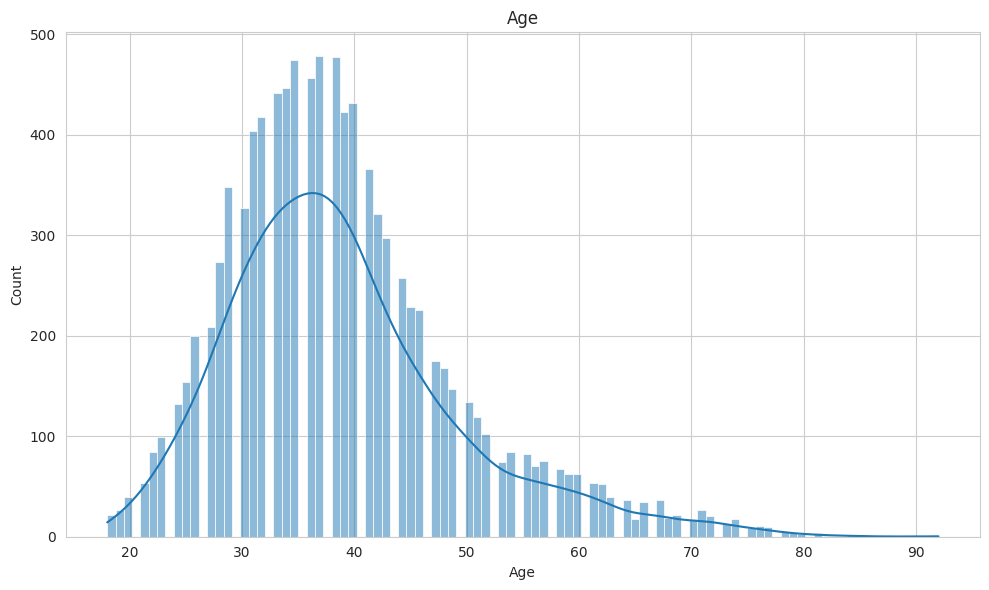

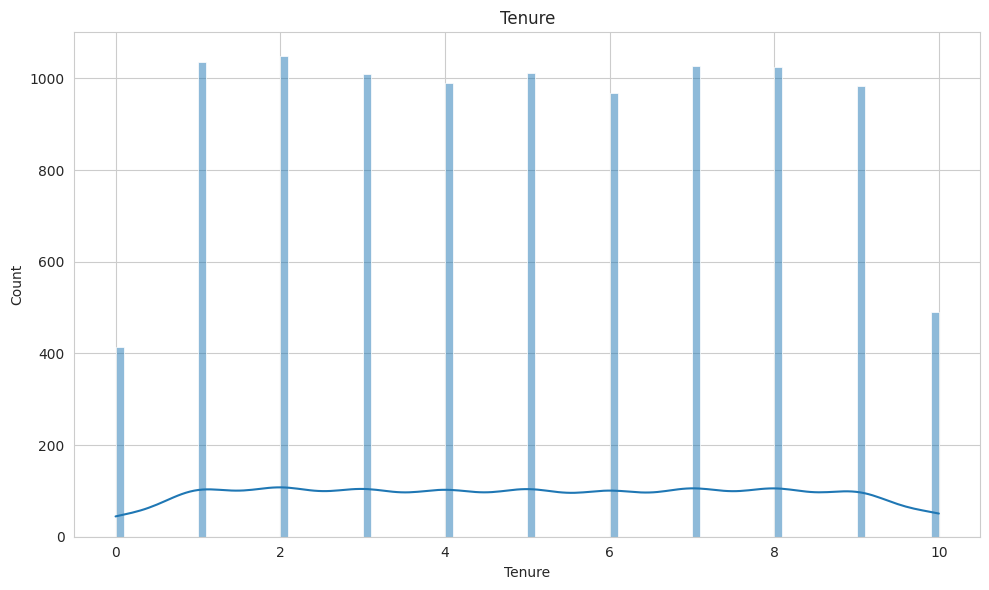

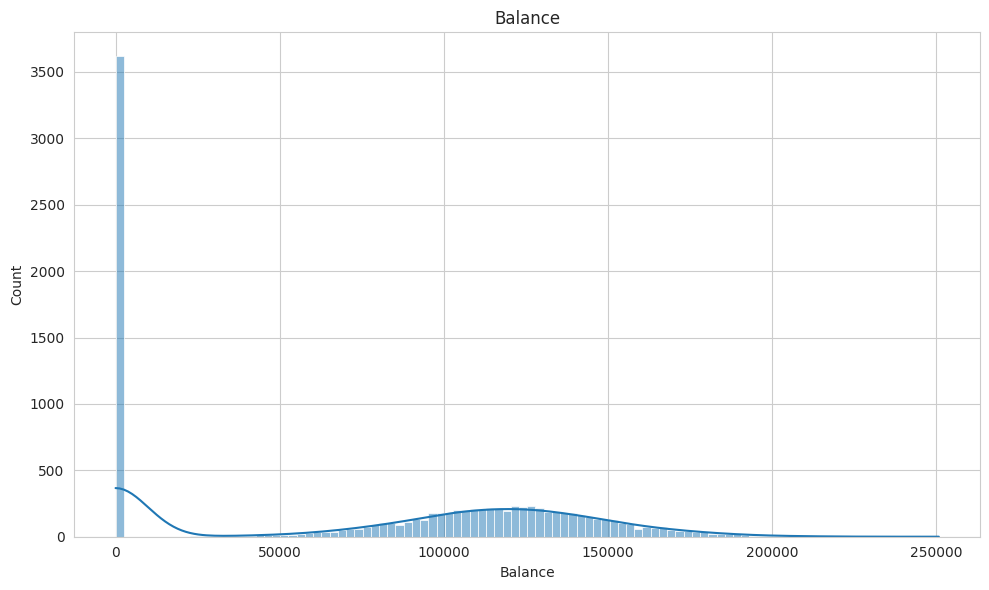

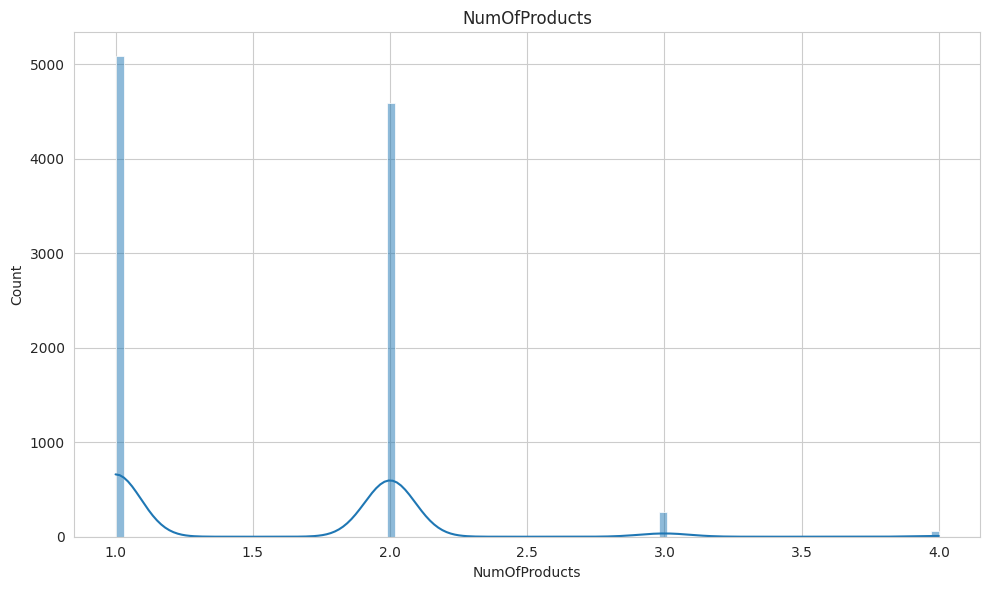

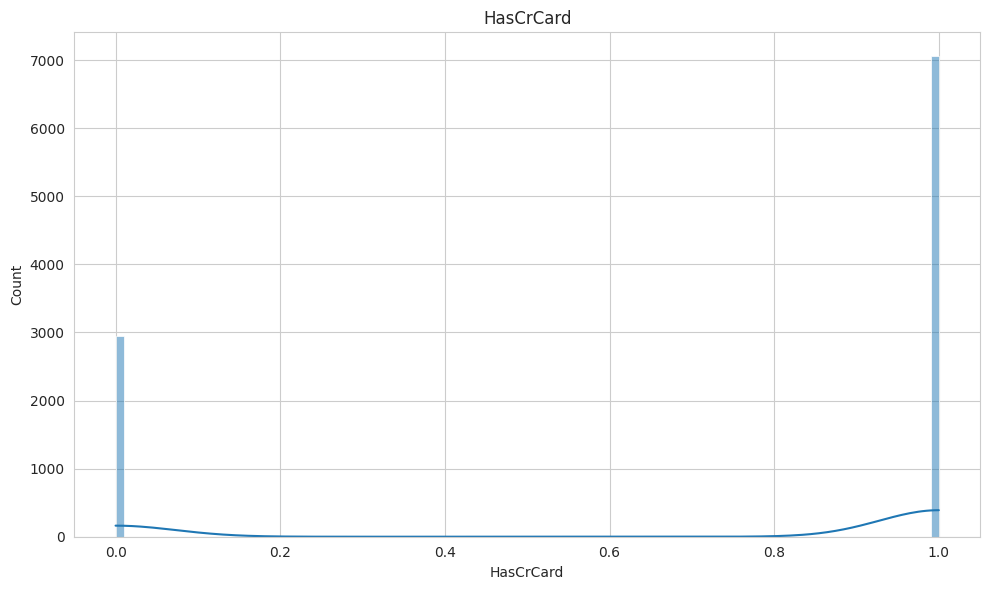

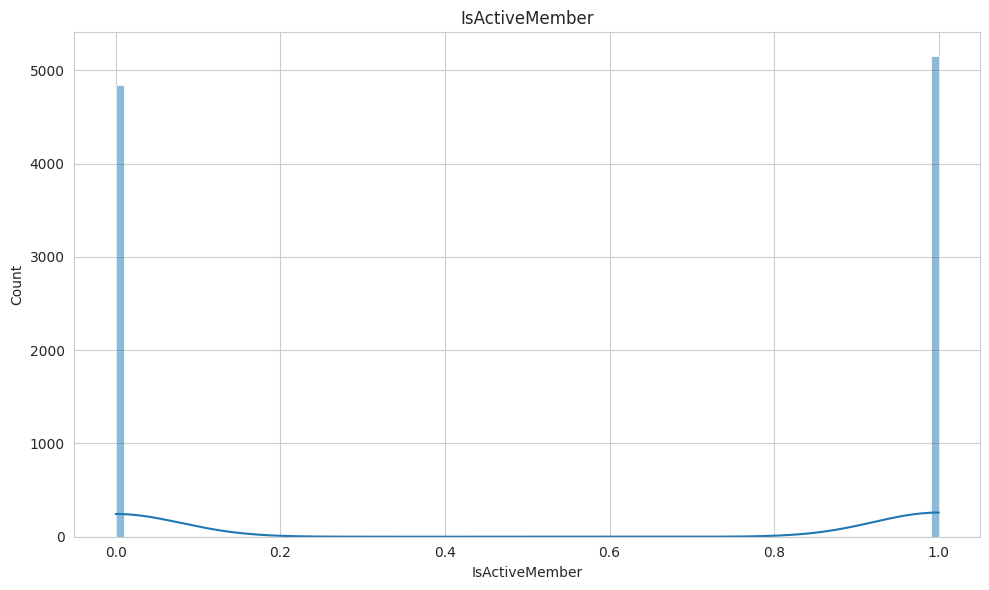

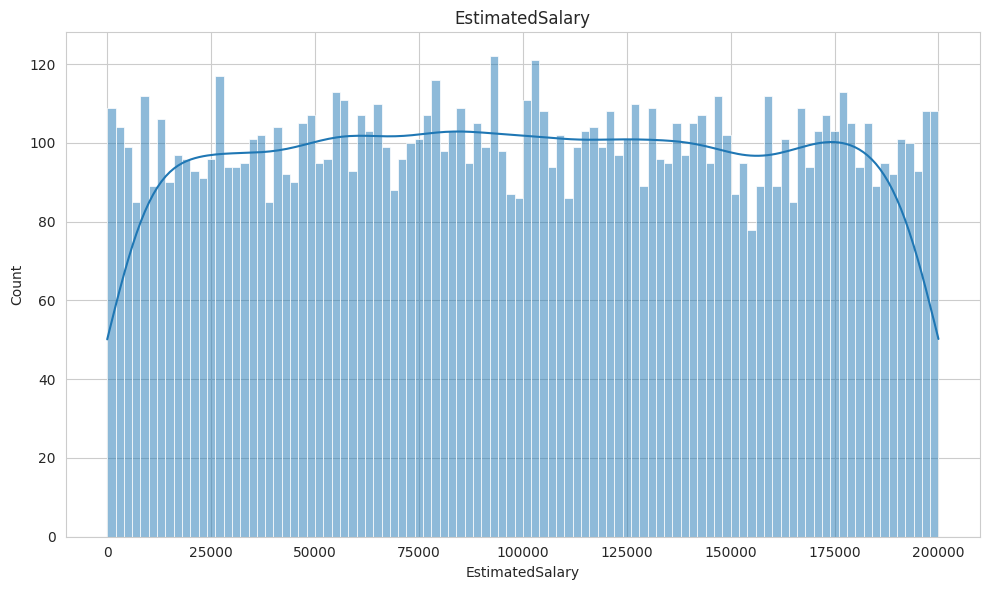

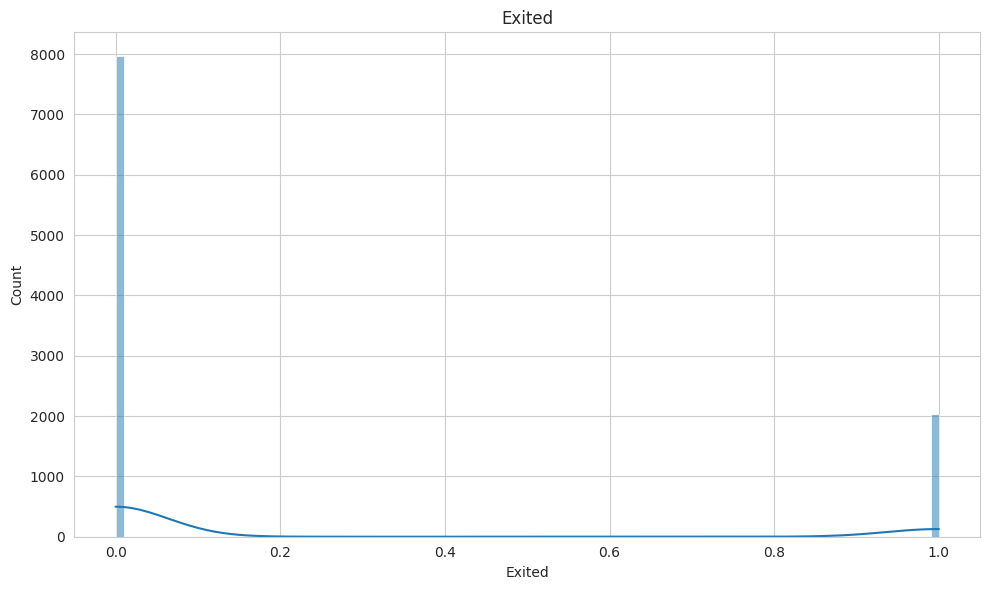

In [221]:
#show the distribution for Estimaited salary feature

for i in df.columns:

    plt.figure()
    plt.title(f'{i}')
    sns.histplot(df[i], bins=100, kde=True, )
    plt.tight_layout();

In [222]:
# We decide to use MinMax Scaler instead of Standard Scaler, since some of our features give a weird shape (as the above plots showed) that is far from the normal distribution (ex. Estimiated salary)
Scaler = MinMaxScaler()

In [223]:
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)
x_val = Scaler.transform(x_val)

In [224]:
X_train.shape

(8100, 13)

In [225]:
X_test.shape

(1000, 13)

In [226]:
x_val.shape

(900, 13)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [227]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [228]:


model = Sequential()
# We tried a network with 2 hidden layers where gave us a validation loss lower than the training loss which is something new to us,
# even though the 3 hidden layers gives us an overfit but we can deal with it by adding dropout layer
# The three hidden layers
model.add(Dense(24, activation="relu", input_dim=X_train.shape[1]))

model.add(Dense(12, activation="relu", input_dim=X_train.shape[1]))

model.add(Dense(6, activation="relu"))

# Output layer
model.add(Dense(1, activation="sigmoid"))




model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])

In [229]:
model.fit(x=X_train, y=y_train, validation_data=(x_val, y_val), batch_size=64, epochs=500, verbose=1)

Epoch 1/500
127/127 [==============================] - 2s 6ms/step - loss: 0.6841 - recall: 0.2376 - val_loss: 0.6334 - val_recall: 0.0000e+00
Epoch 2/500
127/127 [==============================] - 1s 4ms/step - loss: 0.5317 - recall: 0.0000e+00 - val_loss: 0.4920 - val_recall: 0.0000e+00
Epoch 3/500
127/127 [==============================] - 1s 4ms/step - loss: 0.4801 - recall: 0.0000e+00 - val_loss: 0.4781 - val_recall: 0.0000e+00
Epoch 4/500
127/127 [==============================] - 1s 6ms/step - loss: 0.4667 - recall: 0.0000e+00 - val_loss: 0.4718 - val_recall: 0.0000e+00
Epoch 5/500
127/127 [==============================] - 1s 8ms/step - loss: 0.4575 - recall: 0.0018 - val_loss: 0.4628 - val_recall: 0.0000e+00
Epoch 6/500
127/127 [==============================] - 1s 7ms/step - loss: 0.4457 - recall: 0.0521 - val_loss: 0.4510 - val_recall: 0.0820
Epoch 7/500
127/127 [==============================] - 1s 7ms/step - loss: 0.4336 - recall: 0.1533 - val_loss: 0.4427 - val_recall: 0.

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [230]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_112 (Dense)           (None, 24)                336       
                                                                 
 dense_113 (Dense)           (None, 12)                300       
                                                                 
 dense_114 (Dense)           (None, 6)                 78        
                                                                 
 dense_115 (Dense)           (None, 1)                 7         
                                                                 
Total params: 721 (2.82 KB)
Trainable params: 721 (2.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [231]:
loss_df = pd.DataFrame(model.history.history)
loss_df.tail(10)

,loss,recall,val_loss,val_recall
490,0.301,0.532,0.407,0.448
491,0.303,0.532,0.402,0.437
492,0.300,0.541,0.405,0.399
493,0.302,0.533,0.405,0.415
494,0.299,0.530,0.413,0.525
495,0.300,0.538,0.409,0.421
496,0.302,0.542,0.406,0.426
497,0.301,0.541,0.411,0.344
498,0.301,0.540,0.406,0.372
499,0.300,0.538,0.410,0.355


<Figure size 900x900 with 0 Axes>

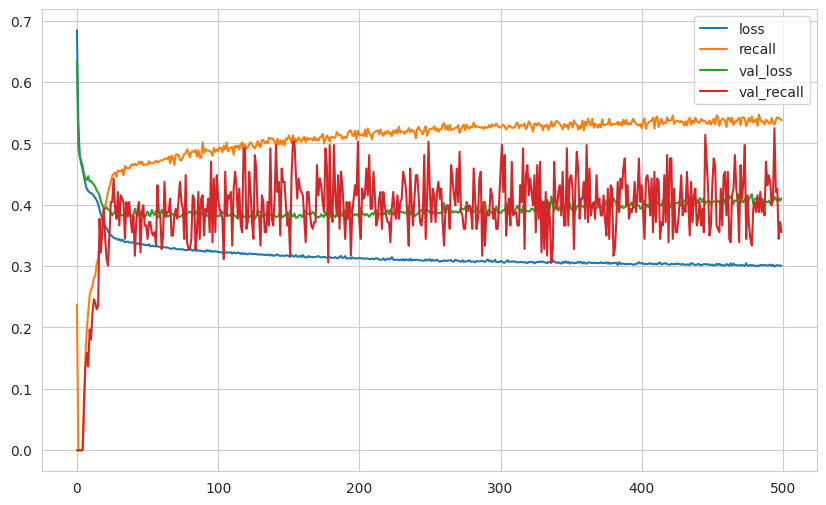

In [232]:
# Regarding the learning curve we can tell that the model overfit the training data, since the validation loss at certain point increases while training loss decreaseplt.
plt.figure(figsize=(9,9))
loss_df.plot()
plt.show()

In [233]:
model.evaluate(X_test, y_test, verbose=0)

[0.3707782030105591, 0.4362744987010956]

In [234]:
loss, Recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("Recall: ", Recall)

loss:  0.3707782030105591
Recall:  0.4362744987010956


In [235]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[762  34]
 [115  89]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       796
           1       0.72      0.44      0.54       204

    accuracy                           0.85      1000
   macro avg       0.80      0.70      0.73      1000
weighted avg       0.84      0.85      0.84      1000



In [236]:
from sklearn import metrics

32/32 [==============================] - 0s 2ms/step


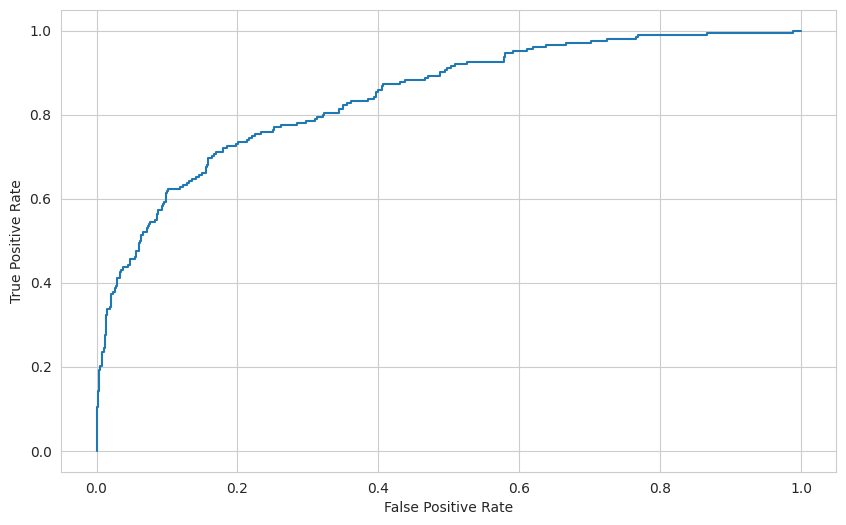

In [237]:
y_pred_proba = model.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

32/32 [==============================] - 0s 2ms/step


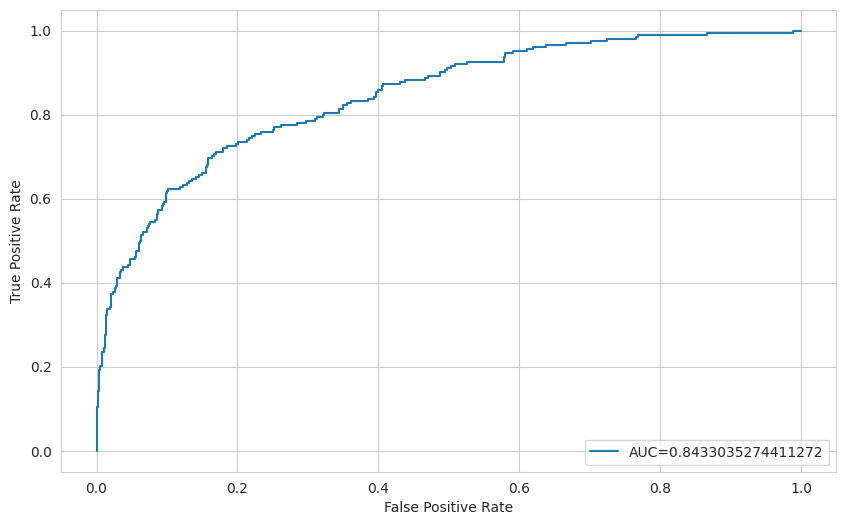

In [238]:
#define metrics
y_pred_proba = model.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create AUC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [239]:
from sklearn.utils import class_weight

In [240]:


model = Sequential()
# Three hidden layers
model.add(Dense(24, activation="relu", input_dim=X_train.shape[1]))

model.add(Dense(12, activation="relu"))

model.add(Dense(6, activation="relu"))

# Output layer
model.add(Dense(1, activation="sigmoid"))



model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])

In [241]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(class_weight='balanced',
                classes=np.unique(y_train),
                y=y_train)
train_class_weights = dict(enumerate(class_weights))
train_class_weights

{0: 0.627906976744186, 1: 2.4545454545454546}

In [242]:
# The model after adding Class weight
model.fit(x=X_train, y=y_train, validation_data=(x_val, y_val), class_weight=train_class_weights ,batch_size=64, epochs=500, verbose=1)

Epoch 1/500
127/127 [==============================] - 2s 6ms/step - loss: 0.6841 - recall: 0.9206 - val_loss: 0.7092 - val_recall: 0.7432
Epoch 2/500
127/127 [==============================] - 1s 5ms/step - loss: 0.6531 - recall: 0.7673 - val_loss: 0.6510 - val_recall: 0.5410
Epoch 3/500
127/127 [==============================] - 1s 4ms/step - loss: 0.6177 - recall: 0.6552 - val_loss: 0.6193 - val_recall: 0.6175
Epoch 4/500
127/127 [==============================] - 1s 5ms/step - loss: 0.5931 - recall: 0.6842 - val_loss: 0.6486 - val_recall: 0.7268
Epoch 5/500
127/127 [==============================] - 1s 4ms/step - loss: 0.5710 - recall: 0.6891 - val_loss: 0.5854 - val_recall: 0.6831
Epoch 6/500
127/127 [==============================] - 1s 6ms/step - loss: 0.5533 - recall: 0.7067 - val_loss: 0.5601 - val_recall: 0.6667
Epoch 7/500
127/127 [==============================] - 1s 6ms/step - loss: 0.5399 - recall: 0.7188 - val_loss: 0.5429 - val_recall: 0.6776
Epoch 8/500
127/127 [======

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [243]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_116 (Dense)           (None, 24)                336       
                                                                 
 dense_117 (Dense)           (None, 12)                300       
                                                                 
 dense_118 (Dense)           (None, 6)                 78        
                                                                 
 dense_119 (Dense)           (None, 1)                 7         
                                                                 
Total params: 721 (2.82 KB)
Trainable params: 721 (2.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [244]:
loss_df = pd.DataFrame(model.history.history)
loss_df.tail(10)

,loss,recall,val_loss,val_recall
490,0.385,0.810,0.511,0.678
491,0.382,0.809,0.492,0.667
492,0.380,0.818,0.480,0.661
493,0.383,0.810,0.549,0.710
494,0.383,0.810,0.553,0.727
495,0.382,0.813,0.538,0.689
496,0.381,0.810,0.486,0.645
497,0.380,0.816,0.455,0.585
498,0.382,0.812,0.489,0.650
499,0.381,0.814,0.486,0.656


<Figure size 900x900 with 0 Axes>

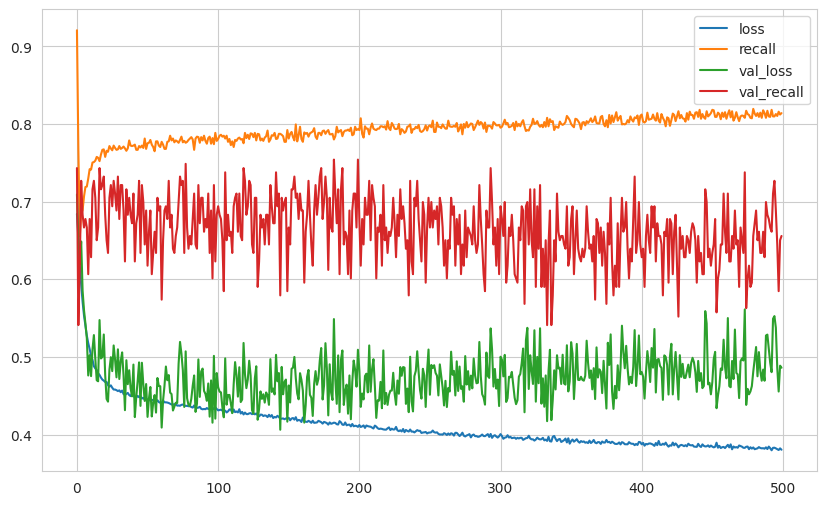

In [245]:
plt.figure(figsize=(9,9)) # still we have overvitting issue even though with class waight
loss_df.plot()
plt.show()

In [246]:
model.evaluate(X_test, y_test, verbose=0)

[0.46679264307022095, 0.7549019455909729]

In [247]:
loss, Recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("Recall: ", Recall)

loss:  0.46679264307022095
Recall:  0.7549019455909729


In [248]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[641 155]
 [ 50 154]]
              precision    recall  f1-score   support

           0       0.93      0.81      0.86       796
           1       0.50      0.75      0.60       204

    accuracy                           0.80      1000
   macro avg       0.71      0.78      0.73      1000
weighted avg       0.84      0.80      0.81      1000



32/32 [==============================] - 0s 2ms/step


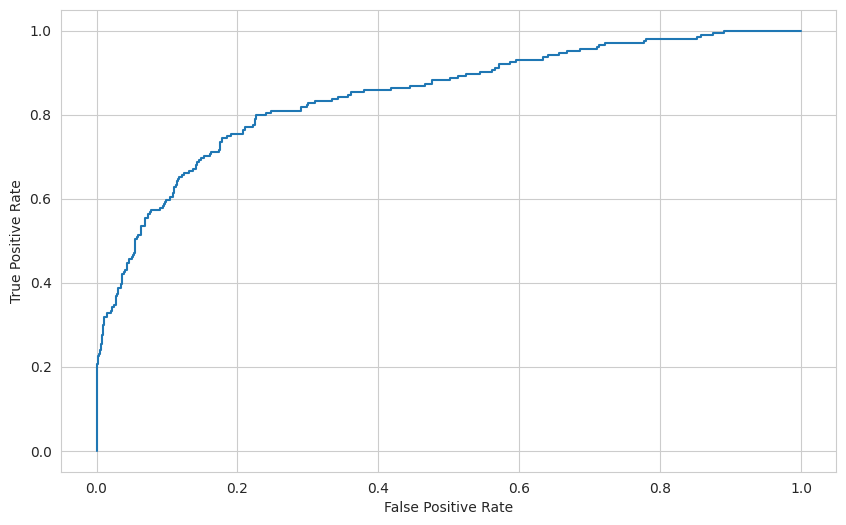

In [249]:
y_pred_proba = model.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

32/32 [==============================] - 0s 2ms/step


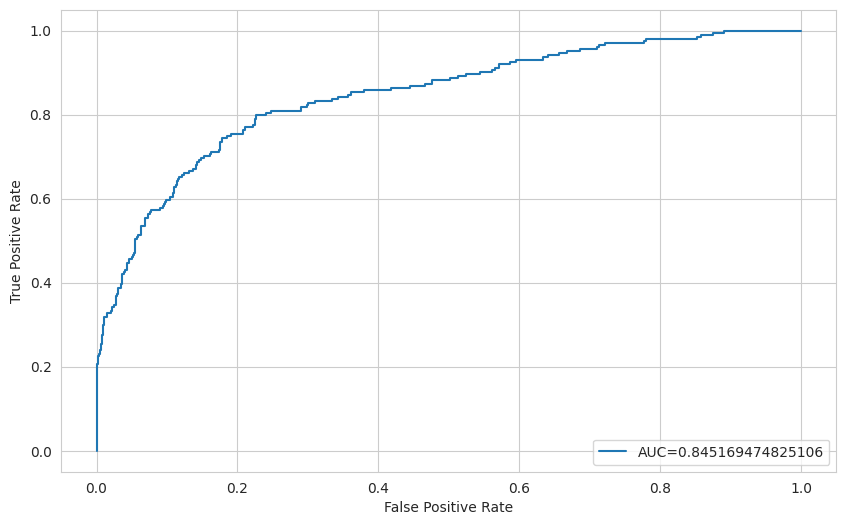

In [250]:
#define metrics
y_pred_proba = model.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create AUC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method

### Increase The Learning Rate and Observe The Results

In [251]:
#So now we will increase the hyperparamter (learining rate)from default one which is 0.001 (in previoues model) with class waight model to see if it change the performnce or not

from tensorflow.keras.optimizers import Adam



model = Sequential()
# Three hidden layers
model.add(Dense(24, activation="relu", input_dim=X_train.shape[1]))

model.add(Dense(12, activation="relu"))

model.add(Dense(6, activation="relu"))

# Output layer
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.005)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])



In [252]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(class_weight='balanced',
                classes=np.unique(y_train),
                y=y_train)
train_class_weights = dict(enumerate(class_weights))
train_class_weights

{0: 0.627906976744186, 1: 2.4545454545454546}

In [253]:
# With Class weight of "balanced" and increasing the learining rate
model.fit(x=X_train, y=y_train, validation_data=(x_val, y_val), class_weight=train_class_weights ,batch_size=64, epochs=500, verbose=1)

Epoch 1/500
127/127 [==============================] - 2s 6ms/step - loss: 0.6407 - recall: 0.5679 - val_loss: 0.5610 - val_recall: 0.5355
Epoch 2/500
127/127 [==============================] - 1s 5ms/step - loss: 0.5880 - recall: 0.7030 - val_loss: 0.4983 - val_recall: 0.5137
Epoch 3/500
127/127 [==============================] - 1s 4ms/step - loss: 0.5527 - recall: 0.7309 - val_loss: 0.5463 - val_recall: 0.7377
Epoch 4/500
127/127 [==============================] - 1s 6ms/step - loss: 0.5313 - recall: 0.7509 - val_loss: 0.5856 - val_recall: 0.8142
Epoch 5/500
127/127 [==============================] - 1s 6ms/step - loss: 0.4960 - recall: 0.7648 - val_loss: 0.4723 - val_recall: 0.7049
Epoch 6/500
127/127 [==============================] - 1s 6ms/step - loss: 0.4772 - recall: 0.7588 - val_loss: 0.5797 - val_recall: 0.8251
Epoch 7/500
127/127 [==============================] - 1s 5ms/step - loss: 0.4805 - recall: 0.7479 - val_loss: 0.4814 - val_recall: 0.7104
Epoch 8/500
127/127 [======

In [254]:
model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_120 (Dense)           (None, 24)                336       
                                                                 
 dense_121 (Dense)           (None, 12)                300       
                                                                 
 dense_122 (Dense)           (None, 6)                 78        
                                                                 
 dense_123 (Dense)           (None, 1)                 7         
                                                                 
Total params: 721 (2.82 KB)
Trainable params: 721 (2.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [255]:
loss_df = pd.DataFrame(model.history.history)
loss_df.tail(10)

,loss,recall,val_loss,val_recall
490,0.374,0.837,0.571,0.749
491,0.376,0.838,0.523,0.672
492,0.375,0.832,0.558,0.699
493,0.374,0.828,0.552,0.699
494,0.372,0.837,0.566,0.710
495,0.374,0.835,0.570,0.738
496,0.370,0.840,0.541,0.661
497,0.371,0.841,0.518,0.656
498,0.375,0.839,0.574,0.694
499,0.375,0.830,0.556,0.656


<Figure size 900x900 with 0 Axes>

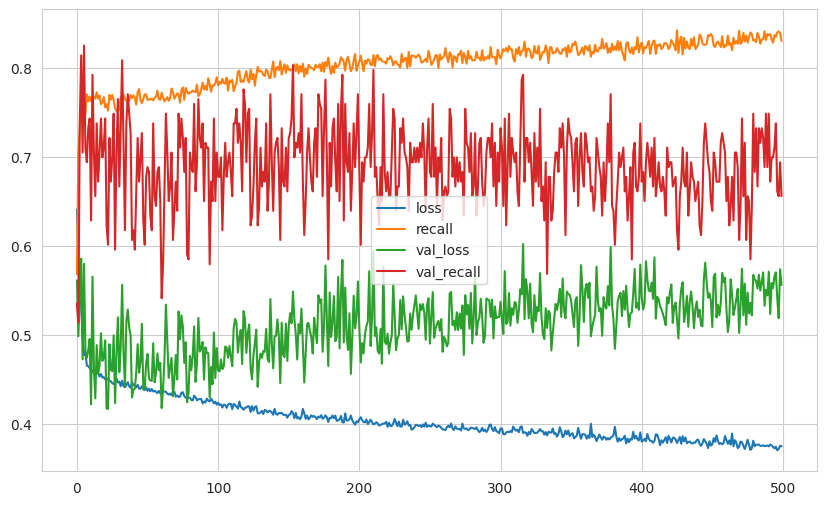

In [256]:
plt.figure(figsize=(9,9)) # still we have overvitting issue even though with class waight and increaing learining rate to 5
loss_df.plot()
plt.show()

In [257]:
model.evaluate(X_test, y_test, verbose=0)

[0.5215222239494324, 0.7156862616539001]

In [258]:
loss, Recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("Recall: ", Recall)

loss:  0.5215222239494324
Recall:  0.7156862616539001


In [259]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 3ms/step
[[625 171]
 [ 58 146]]
              precision    recall  f1-score   support

           0       0.92      0.79      0.85       796
           1       0.46      0.72      0.56       204

    accuracy                           0.77      1000
   macro avg       0.69      0.75      0.70      1000
weighted avg       0.82      0.77      0.79      1000



32/32 [==============================] - 0s 3ms/step


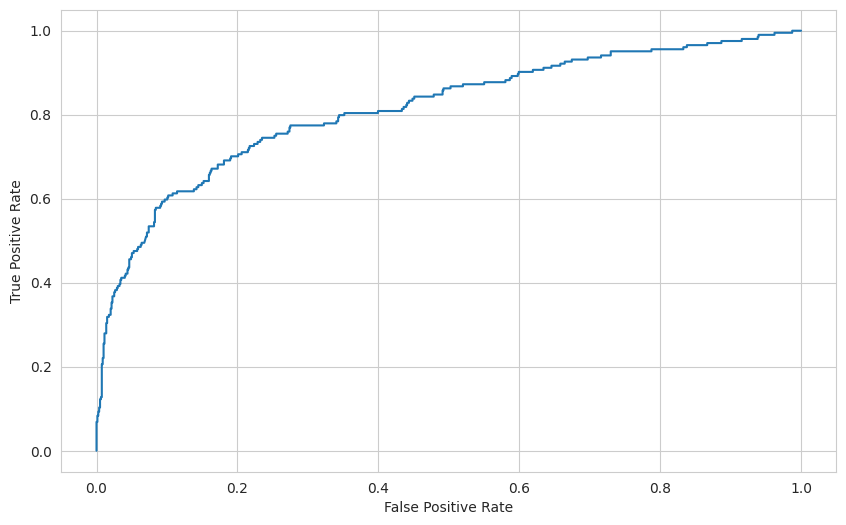

In [260]:
y_pred_proba = model.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

32/32 [==============================] - 0s 3ms/step


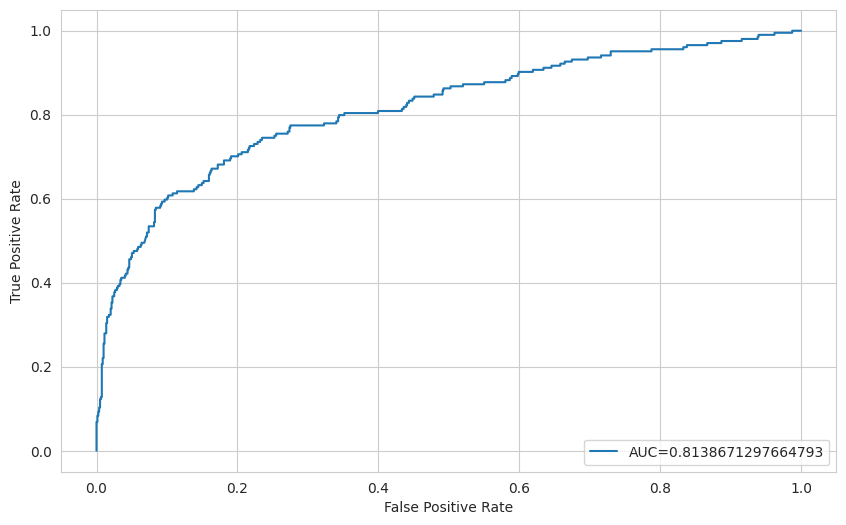

In [261]:
#define metrics
y_pred_proba = model.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create AUC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### Add Dropout Layer

In [264]:
from tensorflow.keras.layers import Dropout

In [265]:
model = Sequential()
# Three hidden layers adding dropout
model.add(Dense(24, activation="relu", input_dim=X_train.shape[1]))
# Dropout(0.2), it means that you are randomly making the activation of 20% of the neurons in the input to zero.
model.add(Dropout(0.2))

model.add(Dense(12, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(6, activation="relu"))

# Output layer
model.add(Dense(1, activation="sigmoid"))

opt = "adam"
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])
#model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [266]:
model.fit(x=X_train, y=y_train, validation_data=(x_val, y_val), class_weight=train_class_weights ,batch_size=64, epochs=500, verbose=1)

Epoch 1/500
127/127 [==============================] - 2s 6ms/step - loss: 0.6862 - recall: 0.7182 - val_loss: 0.6867 - val_recall: 0.5956
Epoch 2/500
127/127 [==============================] - 1s 4ms/step - loss: 0.6640 - recall: 0.6230 - val_loss: 0.6476 - val_recall: 0.4863
Epoch 3/500
127/127 [==============================] - 1s 5ms/step - loss: 0.6488 - recall: 0.5752 - val_loss: 0.6322 - val_recall: 0.5355
Epoch 4/500
127/127 [==============================] - 1s 5ms/step - loss: 0.6308 - recall: 0.6461 - val_loss: 0.6405 - val_recall: 0.6776
Epoch 5/500
127/127 [==============================] - 1s 5ms/step - loss: 0.6219 - recall: 0.6533 - val_loss: 0.6141 - val_recall: 0.6557
Epoch 6/500
127/127 [==============================] - 1s 6ms/step - loss: 0.6080 - recall: 0.6830 - val_loss: 0.5788 - val_recall: 0.6120
Epoch 7/500
127/127 [==============================] - 1s 7ms/step - loss: 0.6027 - recall: 0.6745 - val_loss: 0.5674 - val_recall: 0.6066
Epoch 8/500
127/127 [======

In [267]:
model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_128 (Dense)           (None, 24)                336       
                                                                 
 dropout_56 (Dropout)        (None, 24)                0         
                                                                 
 dense_129 (Dense)           (None, 12)                300       
                                                                 
 dropout_57 (Dropout)        (None, 12)                0         
                                                                 
 dense_130 (Dense)           (None, 6)                 78        
                                                                 
 dense_131 (Dense)           (None, 1)                 7         
                                                                 
Total params: 721 (2.82 KB)
Trainable params: 721 (2.

In [268]:
loss_df = pd.DataFrame(model.history.history)
loss_df.tail(10)

,loss,recall,val_loss,val_recall
490,0.430,0.791,0.468,0.721
491,0.427,0.807,0.437,0.694
492,0.432,0.787,0.449,0.705
493,0.438,0.787,0.453,0.721
494,0.434,0.787,0.463,0.727
495,0.434,0.793,0.456,0.738
496,0.437,0.793,0.458,0.721
497,0.431,0.791,0.474,0.732
498,0.438,0.794,0.463,0.721
499,0.433,0.799,0.449,0.716


<Figure size 900x900 with 0 Axes>

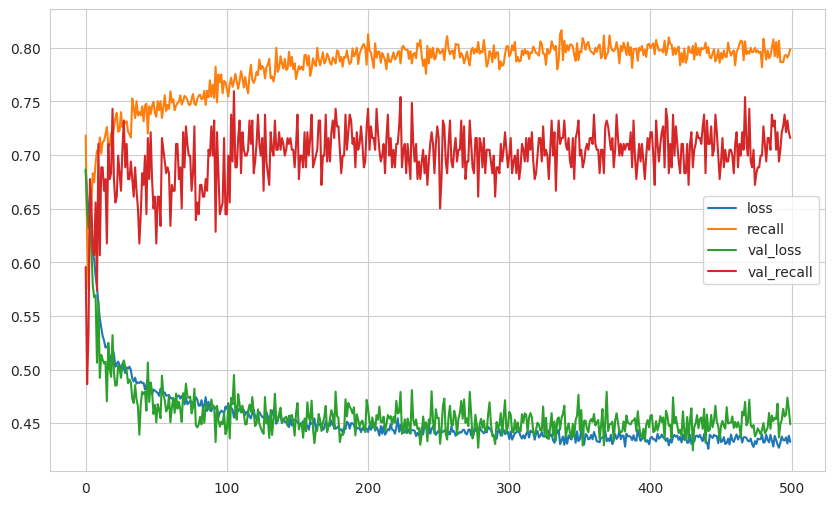

In [269]:
plt.figure(figsize=(9,9)) #even though the droupout layer avoid overviting issue the training accuracy is less than validation accuracy which is strang sitution so that we will apply early stopining stratgy to solve this issue
loss_df.plot()
plt.show()

In [270]:
model.evaluate(X_test, y_test, verbose=0)

[0.46216922998428345, 0.7598039507865906]

In [271]:
loss, Recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("Recall: ", Recall)

loss:  0.46216922998428345
Recall:  0.7598039507865906


In [272]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[620 176]
 [ 49 155]]
              precision    recall  f1-score   support

           0       0.93      0.78      0.85       796
           1       0.47      0.76      0.58       204

    accuracy                           0.78      1000
   macro avg       0.70      0.77      0.71      1000
weighted avg       0.83      0.78      0.79      1000



32/32 [==============================] - 0s 2ms/step


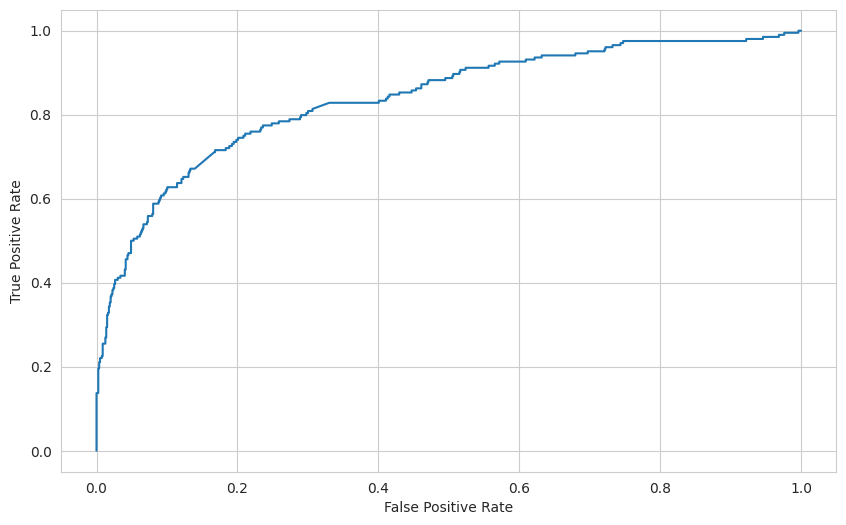

In [273]:
y_pred_proba = model.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

32/32 [==============================] - 0s 2ms/step


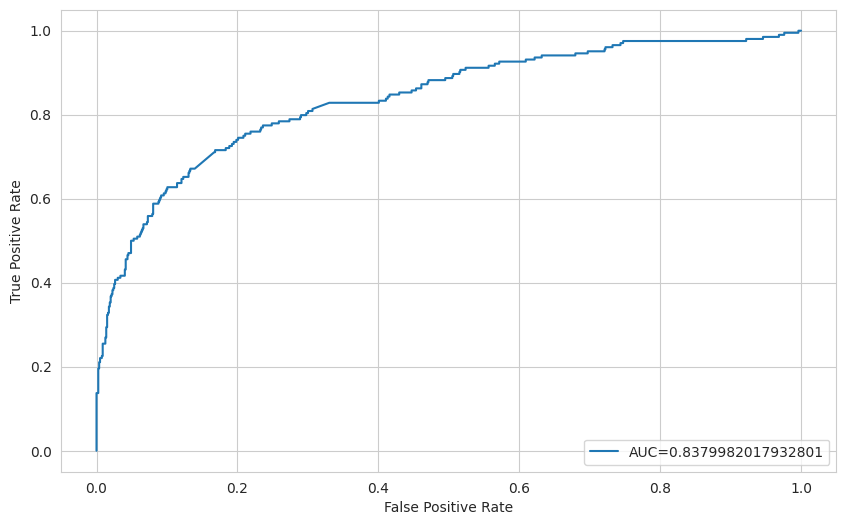

In [274]:
#define metrics
y_pred_proba = model.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create AUC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

### Add Early Stop

#### Monitor the "val_loss" as metric

In [277]:
model = Sequential()
# Three hidden layers adding dropout
model.add(Dense(24, activation="relu", input_dim=X_train.shape[1]))
# Dropout(0.2), it means that you are randomly making the activation of 20% of the neurons in the input to zero.


model.add(Dense(12, activation="relu"))


model.add(Dense(6, activation="relu"))

# Output layer
model.add(Dense(1, activation="sigmoid"))

opt ="adam"
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])
#model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [278]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss", mode="min",verbose=1,patience=50, restore_best_weights = True)


In [279]:

model.fit(x=X_train, y=y_train, validation_data=(x_val, y_val), class_weight=train_class_weights ,batch_size=64, epochs=500, verbose=1, callbacks=[early_stop])


Epoch 1/500
127/127 [==============================] - 2s 6ms/step - loss: 0.6696 - recall: 0.4927 - val_loss: 0.6287 - val_recall: 0.5027
Epoch 2/500
127/127 [==============================] - 1s 4ms/step - loss: 0.6212 - recall: 0.6309 - val_loss: 0.6012 - val_recall: 0.6175
Epoch 3/500
127/127 [==============================] - 1s 6ms/step - loss: 0.5962 - recall: 0.6642 - val_loss: 0.5770 - val_recall: 0.5956
Epoch 4/500
127/127 [==============================] - 1s 6ms/step - loss: 0.5809 - recall: 0.6788 - val_loss: 0.6222 - val_recall: 0.7322
Epoch 5/500
127/127 [==============================] - 1s 7ms/step - loss: 0.5645 - recall: 0.6915 - val_loss: 0.5747 - val_recall: 0.7104
Epoch 6/500
127/127 [==============================] - 1s 5ms/step - loss: 0.5497 - recall: 0.7079 - val_loss: 0.5432 - val_recall: 0.7158
Epoch 7/500
127/127 [==============================] - 1s 5ms/step - loss: 0.5359 - recall: 0.7212 - val_loss: 0.5468 - val_recall: 0.7213
Epoch 8/500
127/127 [======

In [280]:
loss_df = pd.DataFrame(model.history.history)
loss_df.tail(10)

,loss,recall,val_loss,val_recall
101,0.422,0.785,0.457,0.689
102,0.422,0.786,0.453,0.672
103,0.421,0.788,0.454,0.689
104,0.420,0.783,0.451,0.634
105,0.420,0.785,0.500,0.743
106,0.421,0.785,0.459,0.672
107,0.421,0.783,0.448,0.661
108,0.423,0.788,0.474,0.710
109,0.422,0.787,0.442,0.656
110,0.420,0.786,0.445,0.650


<Figure size 900x900 with 0 Axes>

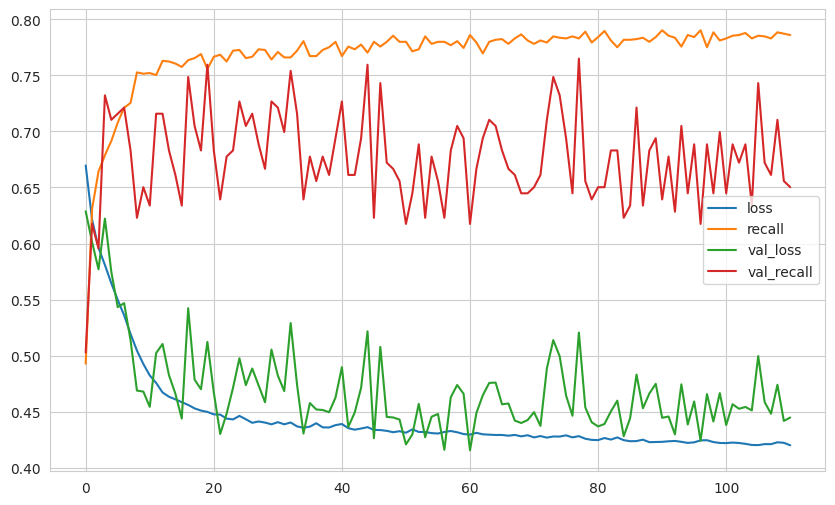

In [281]:
plt.figure(figsize=(9,9)) #this pic indicats that loss function for validation is slitly hight but decresed from the previoues performance
loss_df.plot()
plt.show()

In [282]:
model.evaluate(X_test, y_test, verbose=0)

[0.4101165235042572, 0.7156862616539001]

In [283]:
loss, Recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("Recall: ", Recall)

loss:  0.4101165235042572
Recall:  0.7156862616539001


In [284]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[670 126]
 [ 58 146]]
              precision    recall  f1-score   support

           0       0.92      0.84      0.88       796
           1       0.54      0.72      0.61       204

    accuracy                           0.82      1000
   macro avg       0.73      0.78      0.75      1000
weighted avg       0.84      0.82      0.83      1000



32/32 [==============================] - 0s 2ms/step


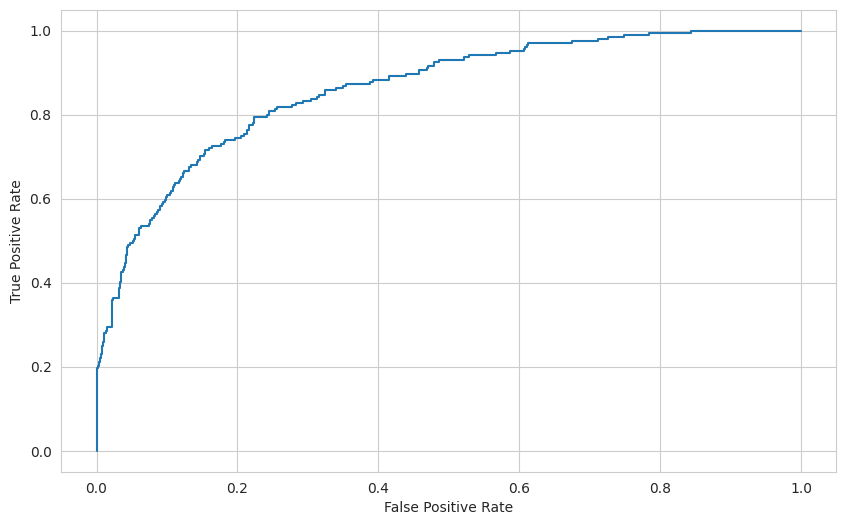

In [285]:
y_pred_proba = model.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

32/32 [==============================] - 0s 2ms/step


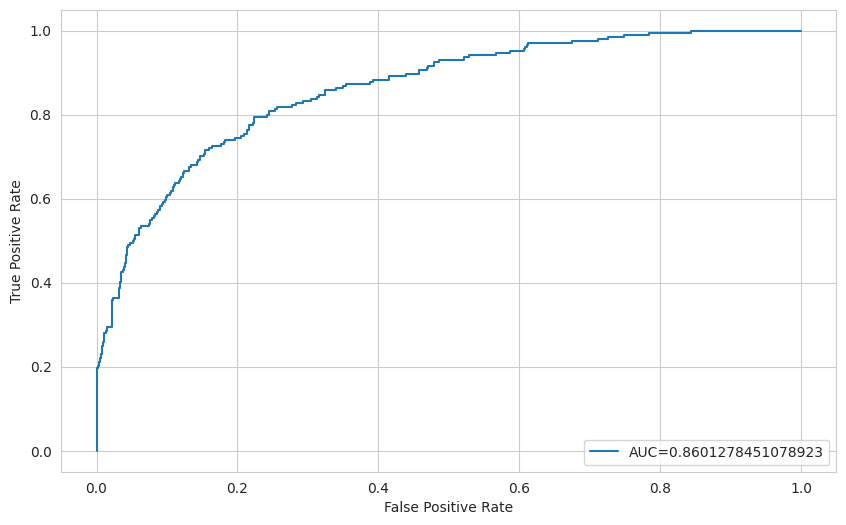

In [286]:
#define metrics
y_pred_proba = model.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create AUC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

#### Monitor the "val_recall" as metric

In [287]:
model = Sequential()
# Three hidden layers adding dropout
model.add(Dense(24, activation="relu", input_dim=X_train.shape[1]))
# Dropout(0.2), it means that you are randomly making the activation of 20% of the neurons in the input to zero.


model.add(Dense(12, activation="relu"))


model.add(Dense(6, activation="relu"))

# Output layer
model.add(Dense(1, activation="sigmoid"))

opt = "adam"
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])
#model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [288]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(
    monitor="val_recall", mode="min", verbose=1, patience=50, restore_best_weights=True
)

In [289]:
model.fit(x=X_train, y=y_train, validation_data=(x_val, y_val), class_weight=train_class_weights ,batch_size=64, epochs=500, verbose=1, callbacks=[early_stop],)


Epoch 1/500
127/127 [==============================] - 2s 6ms/step - loss: 0.6800 - recall: 0.2903 - val_loss: 0.6043 - val_recall: 0.3934
Epoch 2/500
127/127 [==============================] - 1s 5ms/step - loss: 0.6495 - recall: 0.5964 - val_loss: 0.6000 - val_recall: 0.6011
Epoch 3/500
127/127 [==============================] - 1s 5ms/step - loss: 0.6174 - recall: 0.6806 - val_loss: 0.5921 - val_recall: 0.6066
Epoch 4/500
127/127 [==============================] - 1s 4ms/step - loss: 0.5947 - recall: 0.6927 - val_loss: 0.6293 - val_recall: 0.7377
Epoch 5/500
127/127 [==============================] - 1s 5ms/step - loss: 0.5740 - recall: 0.6976 - val_loss: 0.5673 - val_recall: 0.6448
Epoch 6/500
127/127 [==============================] - 1s 4ms/step - loss: 0.5585 - recall: 0.7048 - val_loss: 0.5562 - val_recall: 0.6448
Epoch 7/500
127/127 [==============================] - 1s 4ms/step - loss: 0.5459 - recall: 0.7212 - val_loss: 0.5570 - val_recall: 0.6557
Epoch 8/500
127/127 [======

<Axes: >

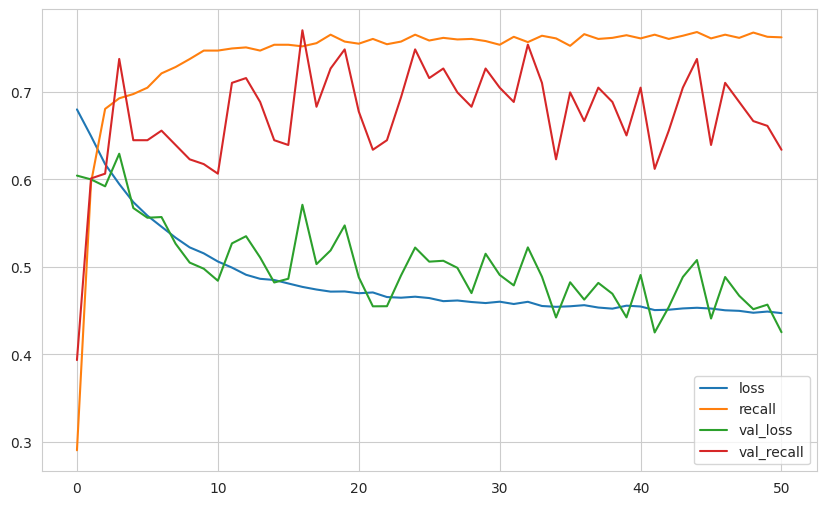

In [290]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [291]:
loss, Recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("Recall: ", Recall)

loss:  0.6036347150802612
Recall:  0.4215686321258545


In [292]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[634 162]
 [118  86]]
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       796
           1       0.35      0.42      0.38       204

    accuracy                           0.72      1000
   macro avg       0.59      0.61      0.60      1000
weighted avg       0.74      0.72      0.73      1000



## Optuna


In [293]:
!pip3 install optuna

In [294]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
import optuna

In [295]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=50, restore_best_weights=True
)

In [296]:
trial_metric = "Recall"
batch_size = 64


def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int("n_units1", 6, 128)
    n_units2 = trial.suggest_int("n_units2", 6, 128)
    n_units3 = trial.suggest_int("n_units3", 6, 128)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1.3e-1)

    tf.random.set_seed(42)
    model = Sequential()
    model.add(Dense(n_units1, input_dim=X_train.shape[1], activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(n_units2, activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(n_units3, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric],
    )
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5)
    w1 = trial.suggest_loguniform("w1", 0.01, 5)
    model.fit(
        X_train,
        y_train,
        validation_data=(x_val, y_val),
        batch_size=batch_size,
        epochs=100,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    score = model.evaluate(X_test, y_test, verbose=0)[1]
    return score

In [297]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)
study.best_params

[I 2023-10-30 12:05:54,325] A new study created in memory with name: no-name-6b2a579a-26e0-4fd1-8ac2-d431bfa00064


Restoring model weights from the end of the best epoch: 7.
Epoch 57: early stopping


[I 2023-10-30 12:07:17,740] Trial 0 finished with value: 0.0 and parameters: {'n_units1': 50, 'n_units2': 9, 'n_units3': 98, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 2.7883013598080507e-05, 'w0': 4.881571673915458, 'w1': 0.03361655356853747}. Best is trial 0 with value: 0.0.


Restoring model weights from the end of the best epoch: 1.
Epoch 51: early stopping


[I 2023-10-30 12:08:00,139] Trial 1 finished with value: 0.0 and parameters: {'n_units1': 111, 'n_units2': 54, 'n_units3': 89, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0849843067079419, 'w0': 0.19720502947505575, 'w1': 0.029028379908995896}. Best is trial 0 with value: 0.0.


Restoring model weights from the end of the best epoch: 6.
Epoch 56: early stopping


[I 2023-10-30 12:08:31,917] Trial 2 finished with value: 0.0 and parameters: {'n_units1': 91, 'n_units2': 17, 'n_units3': 97, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.08640810350655435, 'w0': 0.33330413263210085, 'w1': 0.032585921196538525}. Best is trial 0 with value: 0.0.


Restoring model weights from the end of the best epoch: 1.
Epoch 51: early stopping


[I 2023-10-30 12:09:14,474] Trial 3 finished with value: 0.03431372717022896 and parameters: {'n_units1': 106, 'n_units2': 59, 'n_units3': 111, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0008300681803253868, 'w0': 0.028066666491732645, 'w1': 0.6303423495523862}. Best is trial 3 with value: 0.03431372717022896.
[I 2023-10-30 12:10:38,547] Trial 4 finished with value: 0.9558823704719543 and parameters: {'n_units1': 34, 'n_units2': 13, 'n_units3': 87, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.0012992692057837946, 'w0': 0.012795139980092188, 'w1': 0.32344889084783085}. Best is trial 4 with value: 0.9558823704719543.
[I 2023-10-30 12:11:47,335] Trial 5 finished with value: 0.0 and parameters: {'n_units1': 41, 'n_units2': 78, 'n_units3': 57, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0008001779372061014, 'w0': 0.05609135863620563, 'w1': 0.054120287331768574}. Best is trial 4 with val

Restoring model weights from the end of the best epoch: 7.
Epoch 57: early stopping


[I 2023-10-30 12:12:19,523] Trial 6 finished with value: 0.0 and parameters: {'n_units1': 60, 'n_units2': 107, 'n_units3': 102, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 1.1684348539154442e-05, 'w0': 3.1591691157437287, 'w1': 1.0208669518823101}. Best is trial 4 with value: 0.9558823704719543.


Restoring model weights from the end of the best epoch: 12.
Epoch 62: early stopping


[I 2023-10-30 12:13:00,844] Trial 7 finished with value: 0.0 and parameters: {'n_units1': 83, 'n_units2': 89, 'n_units3': 73, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.08324052624480102, 'w0': 0.10072292737542206, 'w1': 0.011044932520004184}. Best is trial 4 with value: 0.9558823704719543.
[I 2023-10-30 12:14:04,153] Trial 8 finished with value: 0.8872548937797546 and parameters: {'n_units1': 124, 'n_units2': 29, 'n_units3': 61, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.0006574268446940258, 'w0': 0.21265738610718463, 'w1': 2.522557140366605}. Best is trial 4 with value: 0.9558823704719543.


Restoring model weights from the end of the best epoch: 1.
Epoch 51: early stopping


[I 2023-10-30 12:14:33,485] Trial 9 finished with value: 1.0 and parameters: {'n_units1': 81, 'n_units2': 51, 'n_units3': 81, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 1.0964912591951518e-05, 'w0': 0.02058562786981886, 'w1': 0.3020444111206367}. Best is trial 9 with value: 1.0.


{'n_units1': 81,
 'n_units2': 51,
 'n_units3': 81,
 'optimizer': keras.src.optimizers.adam.Adam,
 'learning_rate': 1.0964912591951518e-05,
 'w0': 0.02058562786981886,
 'w1': 0.3020444111206367}

In [320]:
# build model with optuna parameters
unit1, unit2, unit3, optimizer, lr, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["n_units3"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
)
tf.random.set_seed(42)
model = Sequential()
model.add(Dense(unit1, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(unit2, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(unit3, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

# train model
model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    batch_size=64,
    epochs=700,
    callbacks=[early_stop],
    verbose=1,
)

Epoch 1/700
127/127 [==============================] - 3s 8ms/step - loss: 0.7621 - recall: 0.9588 - val_loss: 0.7347 - val_recall: 1.0000
Epoch 2/700
127/127 [==============================] - 1s 5ms/step - loss: 0.7318 - recall: 0.8382 - val_loss: 0.7079 - val_recall: 0.8333
Epoch 3/700
127/127 [==============================] - 1s 5ms/step - loss: 0.7046 - recall: 0.5855 - val_loss: 0.6847 - val_recall: 0.3578
Epoch 4/700
127/127 [==============================] - 1s 5ms/step - loss: 0.6800 - recall: 0.3248 - val_loss: 0.6638 - val_recall: 0.0049
Epoch 5/700
127/127 [==============================] - 1s 5ms/step - loss: 0.6583 - recall: 0.1164 - val_loss: 0.6439 - val_recall: 0.0000e+00
Epoch 6/700
127/127 [==============================] - 1s 5ms/step - loss: 0.6362 - recall: 0.0352 - val_loss: 0.6245 - val_recall: 0.0000e+00
Epoch 7/700
127/127 [==============================] - 1s 5ms/step - loss: 0.6165 - recall: 0.0085 - val_loss: 0.6055 - val_recall: 0.0000e+00
Epoch 8/700
127

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [299]:
history = model.history.history

In [300]:
# Recall for class 1 is the worst, we couldnt get any better
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[768  28]
 [143  61]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.90       796
           1       0.69      0.30      0.42       204

    accuracy                           0.83      1000
   macro avg       0.76      0.63      0.66      1000
weighted avg       0.81      0.83      0.80      1000



32/32 [==============================] - 0s 2ms/step


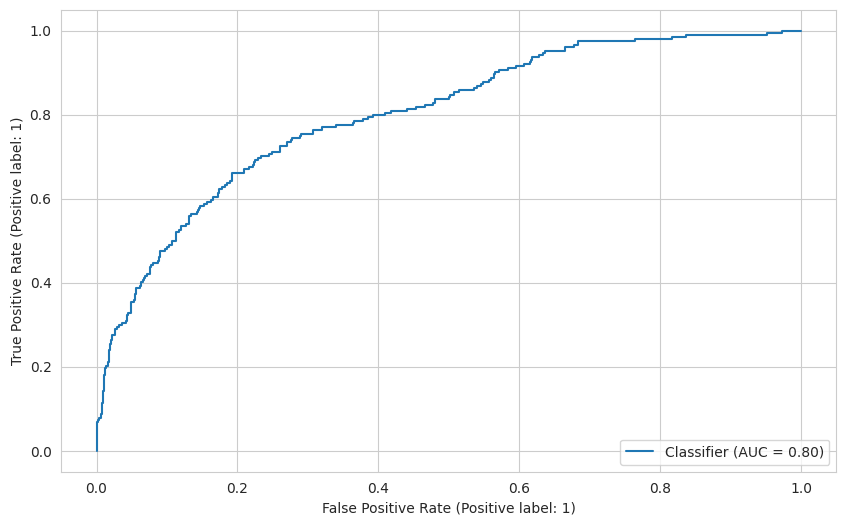

In [301]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [302]:
roc_auc_score(y_test, y_pred_proba)

0.8000295595625184

# Final Model and Model Deployment

Loading Model and Scaler

In [303]:
scaler = MinMaxScaler()

In [304]:
import pickle

pickle.dump(scaler, open("scaler_bank", "wb"))

<Axes: >

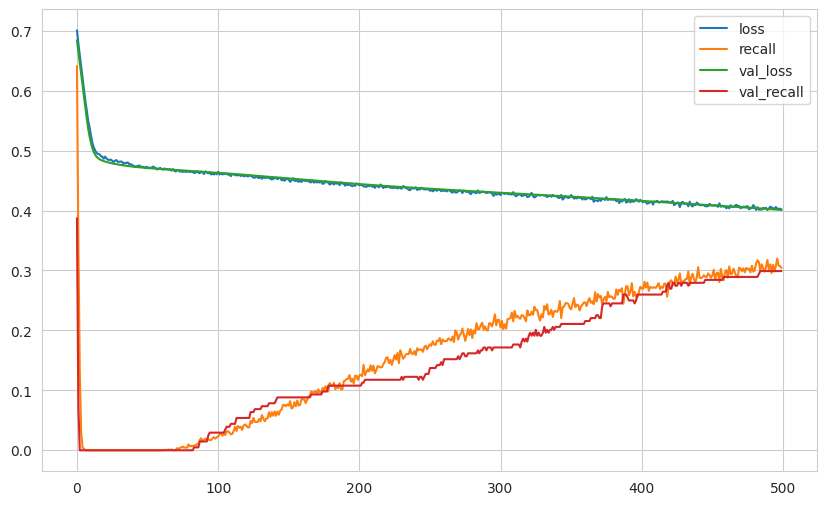

In [305]:
loss_df = pd.DataFrame(history)
loss_df.plot()

In [306]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("recall: ", recall)

loss:  0.40102827548980713
recall:  0.29901960492134094


In [307]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 2ms/step
[[768  28]
 [143  61]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.90       796
           1       0.69      0.30      0.42       204

    accuracy                           0.83      1000
   macro avg       0.76      0.63      0.66      1000
weighted avg       0.81      0.83      0.80      1000



In [308]:
from tensorflow.keras.models import load_model

In [309]:
model.save("model_bank.h5")

In [310]:
#model_cancer = load_model("/content/drive/MyDrive/model_bank.h5")
#scaler_cancer = pickle.load(open("/content/drive/MyDrive/scaler_bank", "rb"))
model_bank = load_model("model_bank.h5")
scaler_bank = pickle.load(open("scaler_bank", "rb"))

## Prediction

In [316]:
single_customer = scaler_bank.fit_transform(single_customer)
single_customer = df_d.drop("Exited", axis=1).iloc[0:1, :]
single_customer

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.000,1,1,1,101348.880,1,0,1,0,0


In [317]:

single_customer = scaler_bank.transform(single_customer)
single_customer

array([[-6.1900000e+02, -4.2000000e+01, -2.0000000e+00,  0.0000000e+00,
        -1.0000000e+00, -1.0000000e+00, -1.0000000e+00, -1.0134888e+05,
        -1.0000000e+00,  0.0000000e+00, -1.0000000e+00,  0.0000000e+00,
         0.0000000e+00]])

In [318]:
(model_bank.predict(single_customer) > 0.5).astype("int32")

1/1 [==============================] - 0s 86ms/step


array([[0]], dtype=int32)

In [319]:
df["Exited"].iloc[0]

1

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___